In [20]:
%cd /content/drive/My Drive/Projects/Handwriting recognizer/Code/
import config 
from glob import glob 
from tensorflow.keras import layers 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
image_files=sorted(glob(f'{config.img_dir}*.jpg'))
labels=[i.split('_')[-1].split('.')[0] for i in image_files]

characters=list(set(char for label in labels for char in label))
tokenizer=layers.experimental.preprocessing.StringLookup(vocabulary=characters,num_oov_indices=0)
reverse_tokenizer=layers.experimental.preprocessing.StringLookup(vocabulary=tokenizer.get_vocabulary(),invert=True)

def preprocess_label(label,tokenizer):
    label=tokenizer(tf.strings.unicode_split(label,input_encoding='UTF-8'))
    label=tf.expand_dims(label,axis=0)
    label=keras.preprocessing.sequence.pad_sequences(label,maxlen=config.max_len,padding='post')
    label=tf.squeeze(label,axis=0)
    return label.numpy()


def encode_single_file(img_path,label):
    img=tf.io.read_file(img_path)
    img=tf.io.decode_jpeg(img)
    img=tf.image.convert_image_dtype(img,tf.float32)
    img=tf.image.resize(img,[config.img_height,config.img_width])
    print(img.shape)
    #img=tf.transpose(img,[1,0,2])
    #label=tokenizer(tf.strings.unicode_split(label,input_encoding='UTF-8'))
    #label=tf.expand_dims(label,axis=0)
    #label=keras.preprocessing.sequence.pad_sequences(label,maxlen=config.max_len)
    #label=tf.squeeze(label,axis=0)
    return {'image':img,'label':label}

print('Proposed image',[config.img_height,config.img_width])
labels=np.array([preprocess_label(label,tokenizer) for label in labels])
train_data=tf.data.Dataset.from_tensor_slices((image_files,labels))
train_data=(train_data.map(
  encode_single_file,num_parallel_calls=tf.data.experimental.AUTOTUNE).
  batch(config.batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  )
train_files=train_data.take(1)
for batch in train_files:
  image=batch['image'].numpy()

/content/drive/My Drive/Projects/Handwriting recognizer/Code
Proposed image [256, 512]
(256, 512, None)


In [21]:
encoded=encode_single_file(image_files[0],labels[0])

(256, 512, 3)


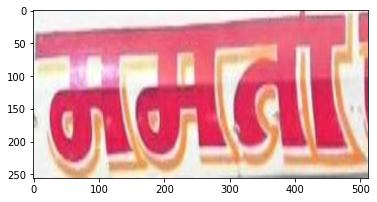

In [19]:
plt.imshow(encoded['image'])